In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### To generate a normal distribution matrix of given dimension

In [183]:
def generatematrix(mean,sd):
    a = np.random.normal(mean,sd[0],(100,2))
    b = np.random.normal(mean,sd[1],(100,2))
    c = np.random.normal(mean,sd[2],(100,2))
    return a,b,c

In [184]:
mean = 2
sd = [0.01,0.1,1]
a,b,c = generatematrix(mean,sd)

#### To find the mean of a matrix

In [185]:
def matrixmean(Matrix):
    return Matrix.mean(0)


#### To find the slope of training values

In [186]:
def slope(Matrix,Matrix_mean):
    return ((np.sum((Matrix[:,0]-Matrix_mean[0])*(Matrix[:,1]-Matrix_mean[1])))/
            (np.sum(pow((Matrix[:,0]-Matrix_mean[0]),2))))

#### To find intercept of training values

In [187]:
def intercept(Matrix_mean,b1):
    return (Matrix_mean[1] - (b1*Matrix_mean[0]))

#### To predict the value using linear regression

In [188]:
def predict(b0,b1,Matrix):
    Matrix_predict = np.zeros((100,2))
    Matrix_predict[:,0] = Matrix[:,0] 
    for i in range (0,len(Matrix)):
        Matrix_predict[i][1] = b0+(b1*Matrix[i][0])
    return Matrix_predict

#### To calculate Mean Square Error (MSE)

In [189]:
def calculateMSE(Matrix,Matrix_Predicted):
    return np.sum(pow((Matrix[:,1] - Matrix_Predicted[:,1]),2))/len(Matrix)
    

#### To compute Linear Regression

In [190]:
def LinReg(Matrix,sd,color):
    
    Matrix_mean = matrixmean(Matrix)
    b0 = 0
    b1 = 0
    b1 = round(slope(Matrix,Matrix_mean),3)
    b0 = round(intercept(Matrix_mean,b1),3)
    Matrix_predict = predict(b0,b1,Matrix)
    MSE = calculateMSE(Matrix,Matrix_predict)
    Matrix_predict = Matrix_predict[Matrix_predict[:,1].argsort()]
    fig1,ax1 = plt.subplots(figsize = (8,5))
    ax1.plot(Matrix[:,0],Matrix[:,1],'.',Matrix_predict[:,0],Matrix_predict[:,1],color)
    ax1.legend(['Data','Predicted'])
    plt.title('σ = '+str(sd)+'     MSE = ' +str(round(MSE,4)))
    

#### To compute Linear Regression using numpy.linalg.lstsq

In [191]:
def LinReglstsq(Matrix,sd,color):
    
    Matrix_mean = matrixmean(Matrix)
    b0 = 0
    b1 = 0
    A = np.ones((100,2))
    A[:,0] = Matrix[:,0]
    y = Matrix[:,1]
    b1,b0 = np.linalg.lstsq(A,y)[0]
    Matrix_predict = predict(b0,b1,Matrix)
    MSE = calculateMSE(Matrix,Matrix_predict)
    Matrix_predict = Matrix_predict[Matrix_predict[:,1].argsort()]
    fig1,ax1 = plt.subplots(figsize = (8,5))
    ax1.plot(Matrix[:,0],Matrix[:,1],'.',Matrix_predict[:,0],Matrix_predict[:,1],color)
    ax1.legend(['Data','Predicted'])
    plt.title('σ = '+str(sd)+'     MSE = ' +str(round(MSE,4)))

### Main function

c:\users\raaghav\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


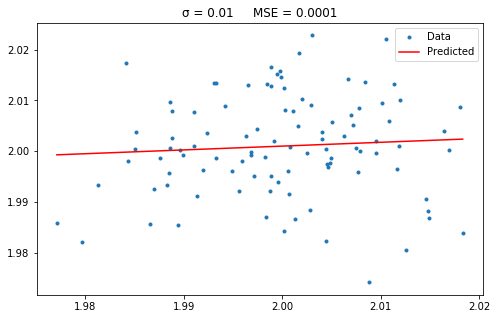

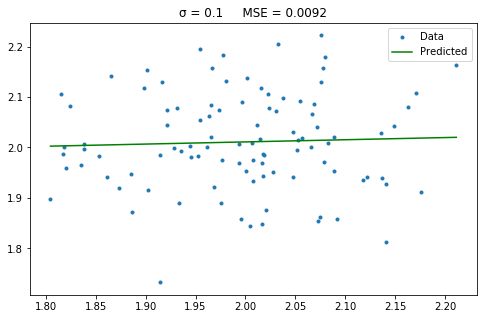

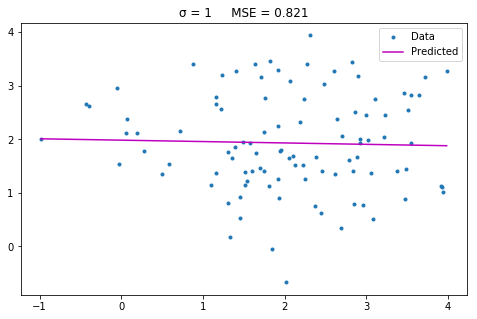

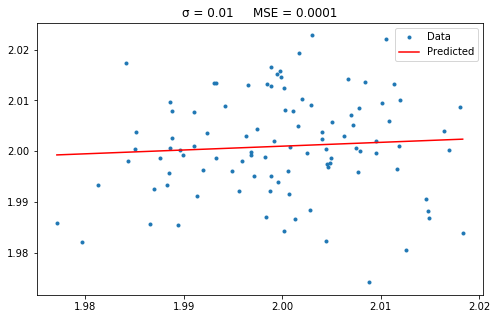

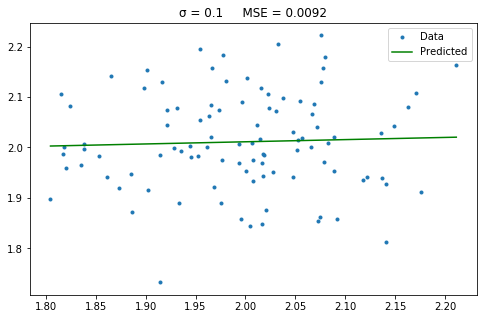

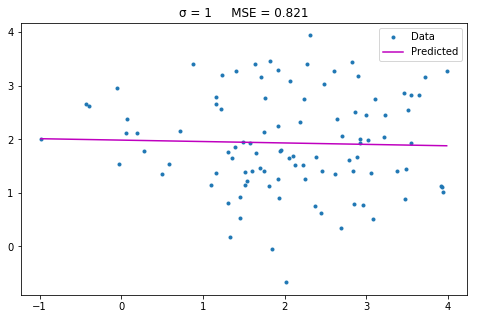

In [192]:
if __name__== "__main__":
    LinReg(a,sd[0],'r-')
    LinReg(b,sd[1],'g-')
    LinReg(c,sd[2],'m-')
    LinReglstsq(a,sd[0],'r-')
    LinReglstsq(b,sd[1],'g-')
    LinReglstsq(c,sd[2],'m-')